In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import collections

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split


## Calculer la corrélation
La corrélation permet de vérifier que les données corrèlent. 

Pearson's correlation coefficient: $$\rho = \frac{\sum\limits_{i=1}^{n}\left(a_i - a_\mu\right)\left(b_i - b_\mu\right)}{\sigma_a \sigma_b}$$

Spearman's correlation coefficient: $$\rho = \frac{\sum\limits_{i=1}^{n}\left(a_{i,rank} - a_{\mu,rank}\right)\left(b_{i,rank} - b_{\mu,rank}\right)}{\sigma_{a,rank} \sigma_{b,rank}}$$

Calculer la corrélation entre la longeur des commentaires et la colère.
Théorie = plus la longueur du commentaire et longue plus c'est colère

In [30]:
df = pd.read_csv("../data/clean/commentaires.csv")

df["longueur"] = df["text"].apply(lambda x: len(x.split()))

moyenne_longueurs = df["longueur"].mean()

print("La moyenne de la longueur des commentaires dans le fichier CSV est de :", moyenne_longueurs)

La moyenne de la longueur des commentaires dans le fichier CSV est de : 22.982142857142858


In [31]:
longueurs_sup_moyenne = df[df["longueur"] > moyenne_longueurs]["longueur"]

colere = df[df["label"] == 3]["longueur"]

longueur_min = min(len(longueurs_sup_moyenne), len(colere))
longueurs_sup_moyenne = longueurs_sup_moyenne.head(longueur_min)
colere = colere.head(longueur_min)

correlation, p_value = pearsonr(longueurs_sup_moyenne, colere)

print("La corrélation entre les longueurs supérieures à la moyenne et la colère :", correlation)
print("La p-value de la corrélation est de :", p_value)

La corrélation entre les longueurs supérieures à la moyenne et la colère : 0.1954935283723542
La p-value de la corrélation est de : 0.5883300555779563


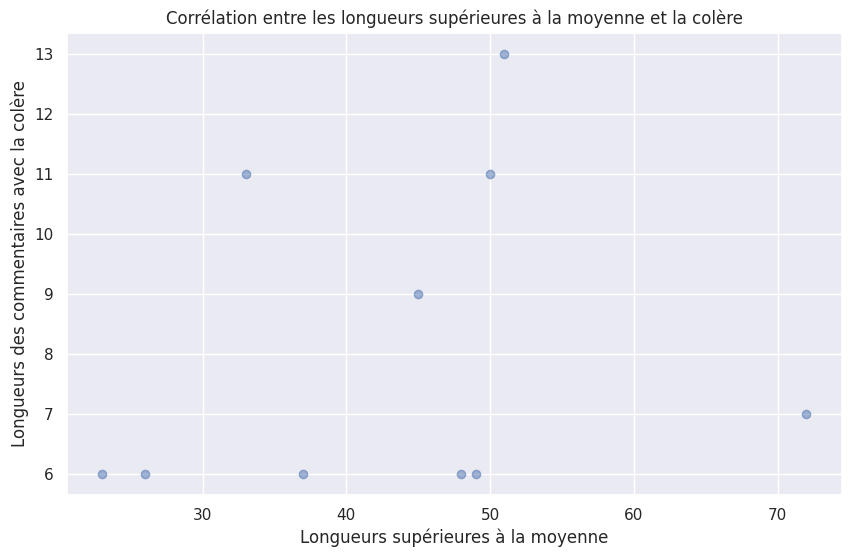

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(longueurs_sup_moyenne, colere, alpha=0.5)
plt.title("Corrélation entre les longueurs supérieures à la moyenne et la colère")
plt.xlabel("Longueurs supérieures à la moyenne")
plt.ylabel("Longueurs des commentaires avec la colère")
plt.grid(True)
plt.show()

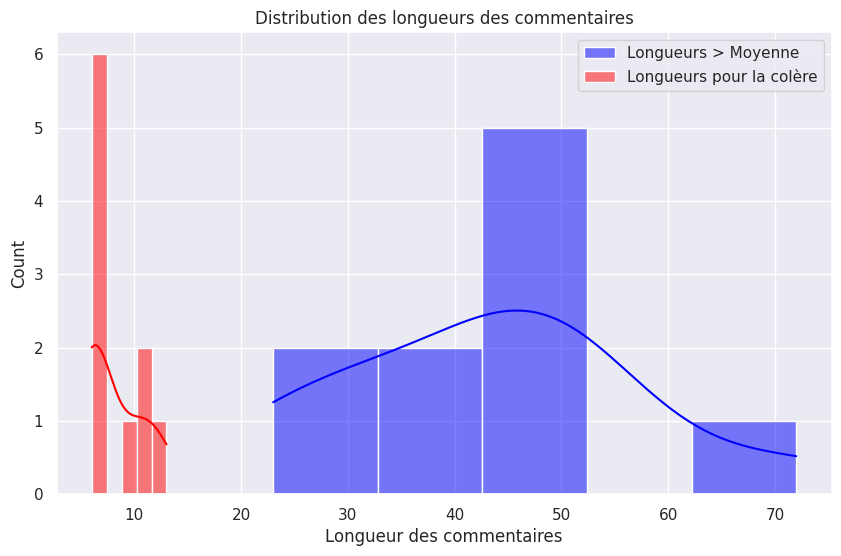

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(longueurs_sup_moyenne, color="blue", label="Longueurs > Moyenne", kde=True)
sns.histplot(colere, color="red", label="Longueurs pour la colère", kde=True)
plt.title("Distribution des longueurs des commentaires")
plt.xlabel("Longueur des commentaires")
plt.legend()
plt.show()

## Loi de Zipf

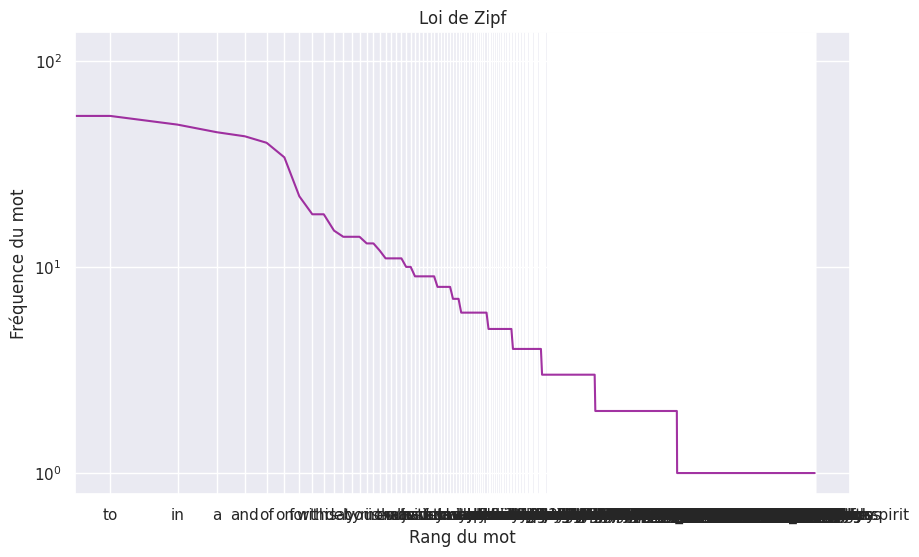

In [34]:
fichier_csv = "../data/clean/commentaires.csv"
df = pd.read_csv(fichier_csv)

total_mots = df["text"].str.split(expand=True).stack().value_counts()

sns.set()
plt.figure(figsize=(10, 6))
plt.loglog(total_mots.index, total_mots.values, alpha=.8, color="darkmagenta")
plt.title("Loi de Zipf")
plt.xlabel("Rang du mot")
plt.ylabel("Fréquence du mot")
plt.show()


## Répartition des sentiments


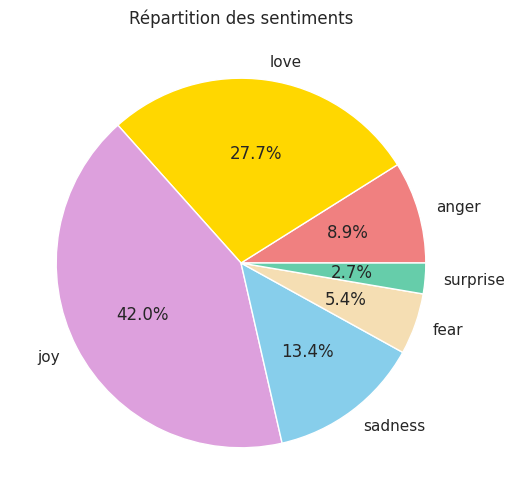

In [35]:
labels = df["label"].tolist()

label_mapping = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}
labels_mapped = [label_mapping[label] for label in labels]

sentiment_couleurs = {
    "sadness": "skyblue",
    "joy": "plum",
    "love": "gold",
    "anger": "lightcoral",
    "fear": "wheat",
    "surprise": "mediumaquamarine"
}

sentiment_counts = collections.Counter(labels_mapped)
sentiments = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())
couleurs = [sentiment_couleurs[sentiment] for sentiment in sentiments]

plt.figure(figsize=(10, 6))
plt.pie(counts, labels=sentiments, colors=couleurs, autopct='%1.1f%%')
plt.title("Répartition des sentiments")
plt.show()


## Nombre d'occurrences

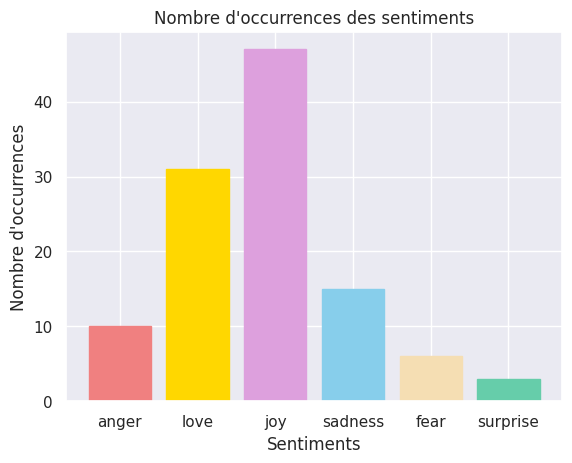

In [36]:
bars = plt.bar(sentiments, counts)
for i, bar in enumerate(bars):
    bar.set_color(couleurs[i])
plt.title('Nombre d\'occurrences des sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Nombre d\'occurrences')
plt.show()

## Le train test split

In [37]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.to_csv("../data/clean/commentaires_train.csv", index=False)
test_df.to_csv("../data/clean/commentaires_test.csv", index=False)